# Discretization
The computer cannot directly handle infinite objects; for example, it cannot evaluate a function $f(x)$ over a subset of the real numbers $X\subset \mathbb{R}$. We therefore need to $\textit{discretize}$ a space with a finite number of grid points.

For example, theoretically we know which value a function $\ln(x)$ returns with any $x\in\mathbb{R}_{++}$. It is not the case in computer because we cannot compute the value of $\ln(x)$ for any $x\in\mathbb{R}_{++}$.

1. compute a function $f(x)=\ln(x)$ where $x\in[1,2]$, with $n$ grid points where $n\in\{10,100,1000\}$.

In [17]:
xmin = 1.0
xmax = 100.0
# xmin = 1.e-3
# xmax = 1.0
xn   = 100

xgrid = collect(LinRange(xmin,xmax,xn));  # LinRange creates equally spaced grid points, and collect stores them as array

# curvature = 3.0
# xgrid = xmin .+ ((collect(0:xn-1) ./ (xn-1)).^curvature) .* (xmax - xmin)


fx = log.(xgrid);

# Plot

1. plot the function.

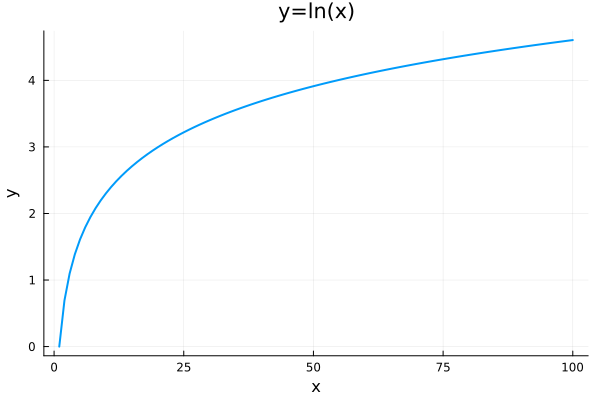

In [18]:
using Plots
plot(xgrid, fx, xlabel="x", ylabel="y", title="y=ln(x)", lw=2, label="")


# Approximation

1. Approximate such function by the second-order polynomial.

  0.345936 seconds (685.65 k allocations: 34.635 MiB, 1.30% gc time, 99.94% compilation time: 95% of which was recompilation)
Estimated parameters: [-1.1440089695314477, 1.3838032411950967, -0.2337469004050803]
Average Deviation (relative to intermediate value): 0.3582%


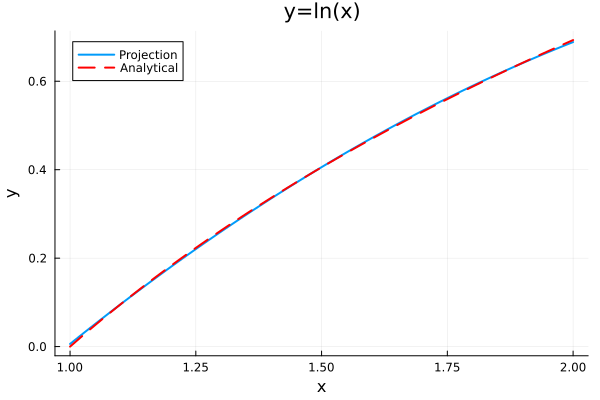

In [50]:
using LeastSquaresOptim
function residual(params)
    a,b,c=params
    return [a + b*x + c*x^2 - y for (x,y) in zip(xgrid,fx)]
end

x0 = [0.0, 0.0, 0.0]  # initial guess for [a, b, c]


@time res = LeastSquaresOptim.optimize(residual, x0, Dogleg())

println("Estimated parameters: ", res.minimizer)

a, b, c = res.minimizer
fx_project = a .+ b .* xgrid .+ c .* xgrid.^2;

Deviation = sum(abs.(fx_project.-fx))/xn/((xmax-xmin)/2);
DeviationRounded = round(Deviation * 100, digits=5)
println("Average Deviation (relative to intermediate value): ", DeviationRounded, "%")

plot(xgrid, fx_project, xlabel="x", ylabel="y", title="y=ln(x)", lw=2, label="Projection")
plot!(xgrid, fx, lw=2,ls=:dash, color=:red, label="Analytical")


2. What if we consider a higher order (e.g., third-order polynomial) or a lower order (e.g., first-order) one?

  0.342256 seconds (683.37 k allocations: 34.430 MiB, 3.21% gc time, 99.94% compilation time: 94% of which was recompilation)
Estimated parameters: [-1.4801103715198471, 2.0887048725926713, -0.7145809298616386, 0.10685200630023142]
Average Deviation (relative to intermediate value): 0.04687%


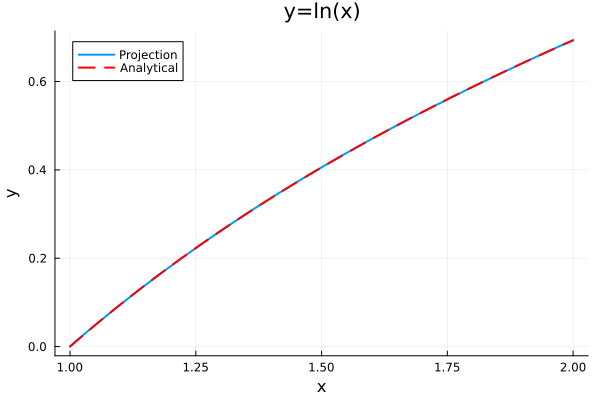

In [51]:
function residual(params)
    # a,b,c=params
    # return [a + b*x + c*x^2 - y for (x,y) in zip(xgrid,fx)]
    a,b,c,d=params
    return [a + b*x + c*x^2 + d*x^3 - y for (x,y) in zip(xgrid,fx)]
end

# x0 = [0.0, 0.0, 0.0]  # initial guess for [a, b, c]
x0 = [0.0, 0.0, 0.0, 0.0]  # initial guess for [a, b, c, d]

@time res = LeastSquaresOptim.optimize(residual, x0, Dogleg())

println("Estimated parameters: ", res.minimizer)

# a, b, c = res.minimizer
# fx_project = a .+ b .* xgrid .+ c .* xgrid.^2;
a, b, c, d = res.minimizer
fx_project = a .+ b .* xgrid .+ c .* xgrid.^2 .+ d .* xgrid.^3;

Deviation = sum(abs.(fx_project.-fx))/xn/((xmax-xmin)/2);
DeviationRounded = round(Deviation * 100, digits=5)
println("Average Deviation (relative to intermediate value): ", DeviationRounded, "%")

plot(xgrid, fx_project, xlabel="x", ylabel="y", title="y=ln(x)", lw=2, label="Projection")
plot!(xgrid, fx, lw=2,ls=:dash, color=:red, label="Analytical")


  0.331363 seconds (680.36 k allocations: 34.375 MiB, 1.65% gc time, 99.94% compilation time: 95% of which was recompilation)
Estimated parameters: [-0.6379508653968289, 0.6825625400527735]
Average Deviation (relative to intermediate value): 3.06135%


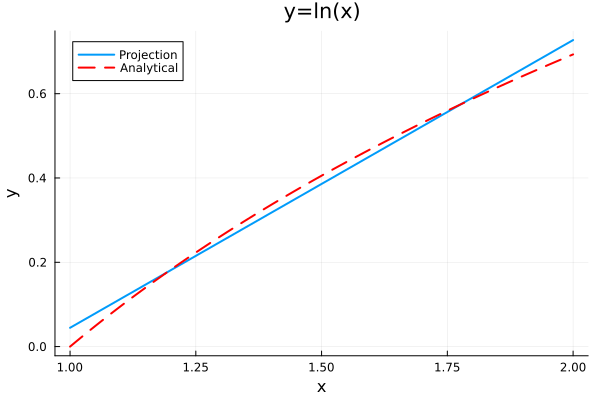

In [52]:
function residual(params)
    # a,b,c=params
    # return [a + b*x + c*x^2 - y for (x,y) in zip(xgrid,fx)]
    a,b=params
    return [a + b*x - y for (x,y) in zip(xgrid,fx)]
end

x0 = [0.0, 0.0]  # initial guess for [a, b, c, d]

@time res = LeastSquaresOptim.optimize(residual, x0, Dogleg())

println("Estimated parameters: ", res.minimizer)


a, b = res.minimizer
fx_project = a .+ b .* xgrid;

Deviation = sum(abs.(fx_project.-fx))/xn/((xmax-xmin)/2);
DeviationRounded = round(Deviation * 100, digits=5)
println("Average Deviation (relative to intermediate value): ", DeviationRounded, "%")

plot(xgrid, fx_project, xlabel="x", ylabel="y", title="y=ln(x)", lw=2, label="Projection")
plot!(xgrid, fx, lw=2,ls=:dash, color=:red, label="Analytical")

  0.381913 seconds (692.97 k allocations: 35.227 MiB, 1.23% gc time, 99.93% compilation time: 95% of which was recompilation)
Estimated parameters: [-1.6875763870285065, 2.6406166811118523, -1.232101182508347, 0.29208548821853586, -0.0064354678229147436, 0.0]
Average Deviation (relative to intermediate value): 13.59252%


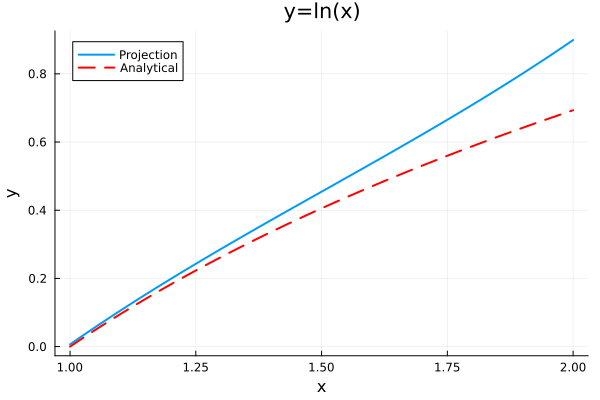

In [53]:
function residual(params)
    # a,b,c=params
    # return [a + b*x + c*x^2 - y for (x,y) in zip(xgrid,fx)]
    a,b,c,d,e,f=params
    return [a + b*x + c*x^2 + d*x^3 + e*x^4 + e*x^5 - y for (x,y) in zip(xgrid,fx)]
end

# x0 = [0.0, 0.0, 0.0]  # initial guess for [a, b, c]
x0 = [0.0, 0.0, 0.0, 0.0, 0.0,0.0]  # initial guess for [a, b, c, d]

@time res = LeastSquaresOptim.optimize(residual, x0, Dogleg())

println("Estimated parameters: ", res.minimizer)

# a, b, c = res.minimizer
# fx_project = a .+ b .* xgrid .+ c .* xgrid.^2;
a, b, c, d, e, f = res.minimizer
fx_project = a .+ b .* xgrid .+ c .* xgrid.^2 .+ d .* xgrid.^3 .+ e .* xgrid.^4 .+ f .* xgrid.^5;

Deviation = sum(abs.(fx_project.-fx))/xn/((xmax-xmin)/2);
DeviationRounded = round(Deviation * 100, digits=5)
println("Average Deviation (relative to intermediate value): ", DeviationRounded, "%")

plot(xgrid, fx_project, xlabel="x", ylabel="y", title="y=ln(x)", lw=2, label="Projection")
plot!(xgrid, fx, lw=2,ls=:dash, color=:red, label="Analytical")
